# $\color{black}{}$
### 7. Clustering
---

Clustering is a process by which you collect a large number of data points into a smaller number of groups, based on the distances between them. It is useful in cases where the volumes of data are large and you want to extract some figures of interest. It is a type of *unsupervised* learning.

It works by taking the n-dimensional data provided, __*X*__ and randomly places __*k*__ seed points in the field which represent the centres of the initial clusters.

   1. It then iterates over every data point in X and assigns each to be associated with whichever cluster centre is closest.
   2. Once all points have been associated with a cluster, it then iterates over each cluster and calculates the new mean of the cluster to be the centroid of all the points assigned to it.

![title](https://milliams.com/courses/applied_data_analysis/kmeans.gif)

### A simple example

In [1]:
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples=500, centers=4, random_state=6)

We plot it to see what it looks like, colouring each point according to what cluster is was generated from.

<AxesSubplot:xlabel='x1', ylabel='x2'>

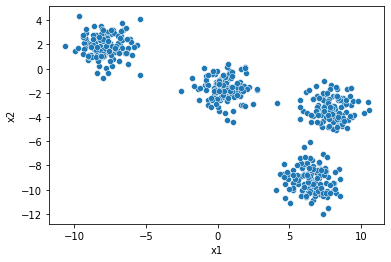

In [3]:
import pandas as pd
import seaborn as sns

points = pd.DataFrame(data, columns=['x1', 'x2'])
sns.scatterplot(data=points, x='x1', y='x2')

We can see here that these clusters are very distinct. This is a very good situation to use k-means clustering in and it will give a useful result.

We initialise the `KMeans` object with the number of clusters we are looking for (`n_clusters` is a hyperparameter). This is important as k-means requires this decision to be made up-front. There are some clustering algorithms which can attempt to calculate the number of clusters for you but when using k-means you need to make that assessment yourself.

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(points)

Now that we have calculated the cluster centres, we can use the `cluster_centers_` data attribute of our model to see what clusters it has decided on.

In [5]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['x1', 'x2'])
cluster_centers

,x1,x2
0,-7.857994,1.892259
1,7.886559,-3.337117
2,0.485425,-1.628580
3,6.485156,-9.212537


Comparing these __*x*__ and __*y*__ values against the plot above, we see that it seems to have placed the centres in the correct location. It's better though to be able to see this directly, so let's plot the centres on top of the original data.



<AxesSubplot:xlabel='x1', ylabel='x2'>

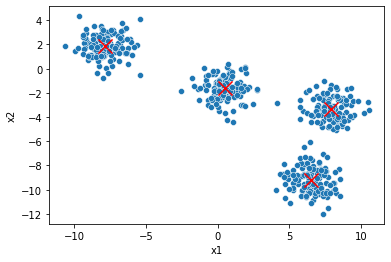

In [6]:
ax = sns.scatterplot(data=points, x='x1', y='x2')
cluster_centers.plot.scatter('x1', 'x2', ax=ax, c='red', s=200, marker='x')

The other piece of data that we can retrieve from the model is which cluster it assigned to each data point. This is available as the `labels_` data attribute and is an array with 500 entries, each being a number between 0 and 3. We can use it to colour our plot to see the clusters emerge.



<AxesSubplot:xlabel='x1', ylabel='x2'>

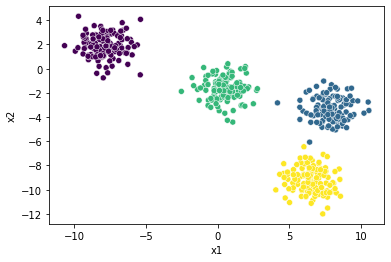

In [7]:
sns.scatterplot(data=points, x='x1', y='x2', c=kmeans.labels_)

### $\color{black}{Exercise}$

In [22]:
# load
from sklearn.datasets import load_iris

iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


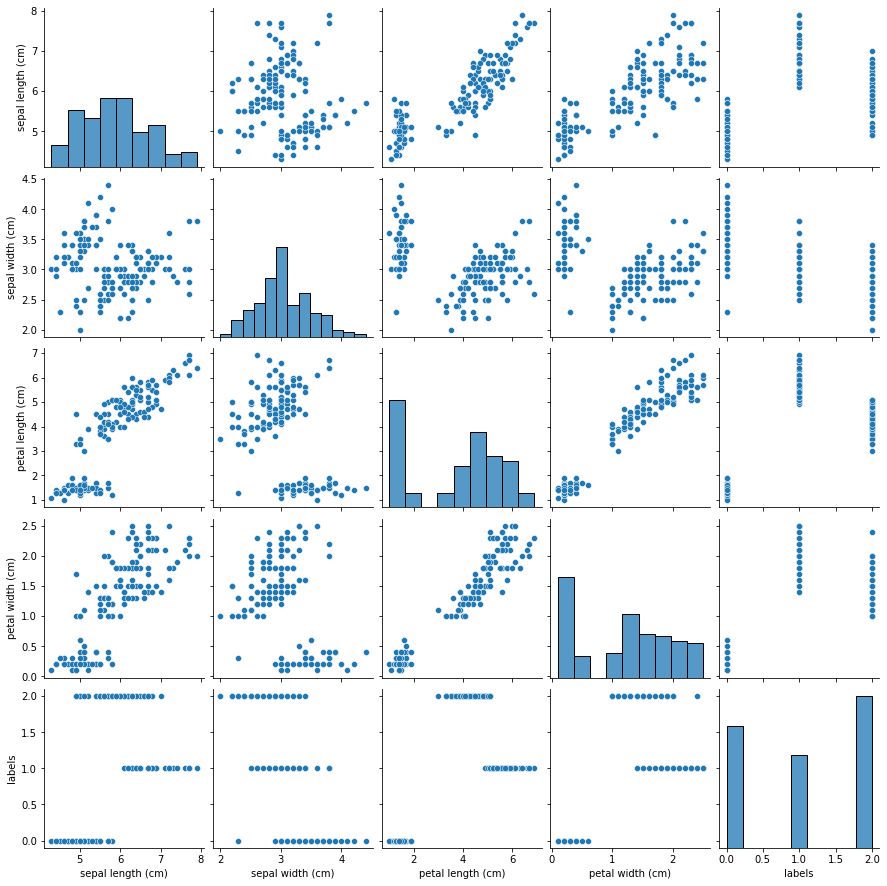

In [36]:
# plotting data
sns.pairplot(data=iris)

In [24]:
# species number
species_number = len(load_iris().target_names)

In [25]:
# fitting the kmeans model
model = KMeans(n_clusters=species_number).fit(iris)

In [34]:
# add labels to df
iris['labels'] = model.labels_

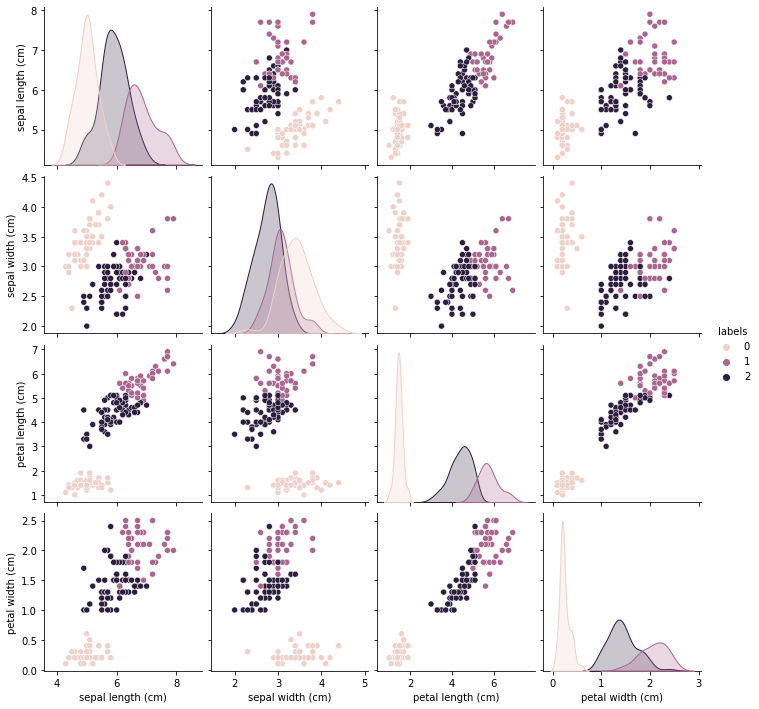

In [35]:
# plotting the result
sns.pairplot(data=iris, hue='labels')